# Data Wrangling Project

In [45]:
import pandas as pd
import numpy as np
import requests
import tweepy 
import json
%matplotlib inline
# You need to be able to create written documents that contain
# images and you need to be able to export these documents as
# PDF files (e.g. Jupyter Notebook, Google Docs, Microsoft Word).

# 1. Data Wrangling

### Gather

The dataset that will be wrangled and analyzed and visualized is a tweet archive of Twitter user @dog_rates, also known as WeRateDogs. It is a Twitter account that rates people's dogs with a humorous comment about a dog. These ratings almost always have a denominator of 10.

The WeRateDogs Twitter archive contains each tweet's text, which can be used to extract rating, dog name, and dog "stage". Also tweets with ratings only have been filtered (there are 2356).

Additional data like retweet count and favorite count can be gathered by anyone who has access to data for the 3000 most recent tweets from Twitter's API.

Key Points to keep in mind when data wrangling for this project:
- You only want original ratings (no retweets) that have images. Not all are dog ratings and some are retweets.
- Only assess and clean (includes merging individual pieces of data according to the rules of tidy data) at least 8 quality issues and at least 2 tidiness issues in this dataset.
- The fact that the rating numerators are greater than the denominators does not need to be cleaned.
- You do not need to gather the tweets beyond August 1st, 2017.

Steps for gathering data:
Gather each of the three pieces of data as described below in a Jupyter Notebook titled *wrangle_act.ipynb*.
1. The WeRateDogs Twitter archive. You can download this file manually (https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv).

In [2]:
df_archive = pd.read_csv('twitter-archive-enhanced.csv')
df_archive.sample(2)
pd.options.display.max_colwidth = 500

In [3]:
# filter retweets
df_archive = df_archive[df_archive['in_reply_to_user_id'].isnull()]
df_archive = df_archive[df_archive['retweeted_status_id'].isnull()]
df_archive[(df_archive['timestamp'] < '2017-08-02 00:00:00 +0000')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

2. The tweet image predictions. This file is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv.

In [4]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
downloaded_obj = requests.get(url)

with open("image-predictions.tsv", "wb") as file:
    file.write(downloaded_obj.content)

In [5]:
df_predictions = pd.read_csv('image-predictions.tsv', sep = '\t')
df_predictions.sample(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
707,685169283572338688,https://pbs.twimg.com/media/CYI10WhWsAAjzii.jpg,1,Bernese_mountain_dog,0.975096,True,Appenzeller,0.014578,True,EntleBucher,0.005943,True
175,669037058363662336,https://pbs.twimg.com/media/CUjlp51WcAA1vGA.jpg,1,Chihuahua,0.803528,True,Pomeranian,0.053871,True,chow,0.032257,True


3. Each tweet's retweet count and favorite count at minimum and any additional data you find interesting. Use the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweets's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.text. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with tweet ID, retweet count, and favorite count. Do not include your Twitter API keys, sectrets, and tokens in your project submission.

In [6]:
# Do NOT include your API keys, sectrets, and tokens in your project submission.
# This is standard practice for APIs and public code.
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [7]:
#source: https://stackoverflow.com/questions/12309269/how-do-i-write-json-data-to-a-file
#source: https://stackoverflow.com/questions/17157753/get-the-error-code-from-tweepy-exception-instance
with open('tweet_json.text', 'w') as myfile:      
    for tweet_id in df_archive['tweet_id']:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')._json
            myfile.write(json.dumps(tweet, ensure_ascii=False))
            myfile.write("\n")
        except tweepy.TweepError as e:
            pass

In [8]:
#source: https://knowledge.udacity.com/questions/280182
df_twitter = pd.DataFrame(columns = ['tweet_id', 'retweet_count', 'favorite_count'])
with open('tweet_json.text', 'r') as myfile:
    for line in myfile:
        status = json.loads(line)
        tweet_id = status['id_str']
        retweet_count = status['retweet_count']
        favorite_count = status['favorite_count']
        df_twitter = df_twitter.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
                                                   columns = ['tweet_id', 'retweet_count', 'favorite_count']))
df_twitter = df_twitter.reset_index(drop = True)

### Assess

In [9]:
df_twitter.sample(2)

,tweet_id,retweet_count,favorite_count
1280,690938899477221376,1819,3880
1307,689289219123089408,876,2137


In [10]:
df_twitter.describe()

,tweet_id,retweet_count,favorite_count
count,2089,2089,2089
unique,2089,1618,1941
top,699413908797464576,651,212
freq,1,5,4


In [11]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2089 entries, 0 to 2088
Data columns (total 3 columns):
tweet_id          2089 non-null object
retweet_count     2089 non-null object
favorite_count    2089 non-null object
dtypes: object(3)
memory usage: 49.0+ KB


In [12]:
df_predictions.sample(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
511,676191832485810177,https://pbs.twimg.com/media/CWJQ4UmWoAIJ29t.jpg,2,Chihuahua,0.376741,True,Italian_greyhound,0.173114,True,muzzle,0.071485,False
978,707059547140169728,https://pbs.twimg.com/media/Cc_64zVWEAAeXs7.jpg,1,Samoyed,0.897312,True,Great_Pyrenees,0.039180,True,kuvasz,0.019516,True


In [13]:
df_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [14]:
df_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [15]:
df_archive.sample(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1309,707059547140169728,NaN,NaN,2016-03-08 04:25:07 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to Cupcake. She's an Icelandic Dippen Dot. Confused by the oddly geometric lawn pattern. 11/10 https://t.co/D7rorf4YKL,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/707059547140169728/photo/1,https://twitter.com/dog_rates/status/707059547140169728/photo/1",11,10,Cupcake,None,None,None,None
2128,670303360680108032,NaN,NaN,2015-11-27 18:09:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Speckled Cauliflower Yosemite named Hemry. He's terrified of intruder dog. Not one bit comfortable. 9/10 https://t.co/yV3Qgjh8iN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670303360680108032/photo/1,9,10,a,None,None,None,None


In [16]:
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.097000e+03,0.0,0.0,0.0,0.0,2097.000000,2097.000000
mean,7.365594e+17,NaN,NaN,NaN,NaN,12.189318,10.448736
std,6.710178e+16,NaN,NaN,NaN,NaN,40.364996,6.645061
min,6.660209e+17,NaN,NaN,NaN,NaN,0.000000,2.000000
25%,6.768197e+17,NaN,NaN,NaN,NaN,10.000000,10.000000
50%,7.098528e+17,NaN,NaN,NaN,NaN,11.000000,10.000000
75%,7.877176e+17,NaN,NaN,NaN,NaN,12.000000,10.000000
max,8.924206e+17,NaN,NaN,NaN,NaN,1776.000000,170.000000


In [17]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: float64(4), int64(3), object(10)

In [18]:
df_archive[df_archive['expanded_urls'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
375,828361771580813312,NaN,NaN,2017-02-05 21:56:51 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Beebop and Doobert should start a band 12/10 would listen,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
707,785515384317313025,NaN,NaN,2016-10-10 16:20:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Today, 10/10, should be National Dog Rates Day",NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
1445,696518437233913856,NaN,NaN,2016-02-08 02:18:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Oh my god 10/10 for every little hot dog pupper,NaN,NaN,NaN,NaN,10,10,None,None,None,pupper,None


Quality Issues (8)
1. tweet_id should be the same data type in all three dataframes
2. df_twitter: retweet_count needs to be a numerical data type
3. df_twitter: favorite_count needs to be a numerical data type
4. no retweets contained anymore, therefore in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp do not contain any values and are therefore not necessary anymore
5. df_archive: 3 expanded_urls are missing
6. df_archive: source column is hard to read
7. completeness: the data frames do not contain all the same number of data sets
8. df_predictions: names in pg1, pg2 and pg3 are not written in the same way

Tidiness Issues (2)
9. a single observation is stored in multiple tables
10. dog stage should be in one column

### Clean

#### Define

1. df_twitter: change data type of tweet_id to int64
2. df_twitter: change data type of retweet_count
3. df_twitter: change data type of favorite_count to int64
4. df_archive: drop in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp
5. df_archive: filter rows without extended url
6. df_archive: filter source column
7. df_archive and df_predictions can be merged
8. df_predictions: remove '-' and write everything in small letters
9. df_archive and df_predictions can be merged
10. merge dog stages to one column

#### Code

In [19]:
#1 #2 #3
df_twitter = df_twitter.astype(int)

In [20]:
#4
df_archive = df_archive.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

In [21]:
#5
df_archive = df_archive[df_archive['expanded_urls'].notnull()]

In [22]:
#6
def split_source(i):
    start = i.find("\">") + len("\">")
    end = i.find("</a>")
    return i[start:end]

df_archive['source'] = df_archive['source'].map(split_source)

In [23]:
#8
df_predictions[['p1', 'p2', 'p3']] = df_predictions[['p1', 'p2', 'p3']].replace("_", " ")
df_predictions['p1'] = df_predictions['p1'].str.lower()
df_predictions['p2'] = df_predictions['p2'].str.lower()
df_predictions['p3'] = df_predictions['p3'].str.lower()

In [24]:
#10
df_archive[['doggo', 'floofer', 'pupper', 'puppo']] = df_archive[['doggo', 'floofer', 'pupper', 'puppo']].replace("None", " ")
df_archive['stage'] = df_archive.doggo.astype(str) + df_archive.floofer.astype(str) + df_archive.pupper.astype(str) + df_archive.puppo.astype(str)
df_archive = df_archive.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

In [25]:
#7, 9
# df_archive and df_predictions can be merged
df_merge = pd.merge(df_archive, df_predictions, on='tweet_id', how='outer')
df_merge.sample(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1778,671763349865160704,2015-12-01 18:50:38 +0000,Twitter for iPhone,Say hello to Mark. He's a good dog. Always ready to go for a walk. Excellent posture. 9/10 keep it up Mark https://t.co/m9NleZ1i80,https://twitter.com/dog_rates/status/671763349865160704/photo/1,9.0,10.0,Mark,,https://pbs.twimg.com/media/CVKVM3NW4AAdi1e.jpg,1.0,prayer_rug,0.445334,False,doormat,0.275311,False,bib,0.048813,False
1711,673345638550134785,2015-12-06 03:38:05 +0000,Twitter for iPhone,This is Gerald. He's a fluffy lil yellow pup. Always looks like his favorite team just lost on a hail mary. 7/10 https://t.co/GpSkpN8kXS,https://twitter.com/dog_rates/status/673345638550134785/photo/1,7.0,10.0,Gerald,,https://pbs.twimg.com/media/CVg0SVRWEAAsBrS.jpg,1.0,hamster,0.761025,False,weasel,0.069362,False,pomeranian,0.064627,True
391,813066809284972545,2016-12-25 17:00:08 +0000,Twitter for iPhone,This is Tyr. He is disgusted by holiday traffic. Just trying to get to Christmas brunch on time. 12/10 hurry up pup https://t.co/syuTXARdtN,https://twitter.com/dog_rates/status/813066809284972545/photo/1,12.0,10.0,Tyr,,https://pbs.twimg.com/media/C0iX8OOVEAEIpMC.jpg,1.0,toy_terrier,0.776400,True,pembroke,0.115034,True,basenji,0.048873,True


In [26]:
df_complete = pd.merge(df_merge, df_twitter, on='tweet_id', how='outer')
df_complete.sample(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
773,749317047558017024,2016-07-02 19:01:20 +0000,Twitter for iPhone,This is Blu. He's a wild bush Floofer. I wish anything made me as happy as bushes make Blu. 12/10 would frolic with https://t.co/HHUAnBb6QB,https://twitter.com/dog_rates/status/749317047558017024/video/1,12.0,10.0,Blu,floofer,https://pbs.twimg.com/ext_tw_video_thumb/749316899712950272/pu/img/nvZI9mkoAxt89sul.jpg,...,0.155144,True,lakeland_terrier,0.108382,True,buckeye,0.074617,False,2111.0,5235.0
1029,711306686208872448,2016-03-19 21:41:44 +0000,Twitter for iPhone,What hooligan sent in pictures w/out a dog in them? Churlish af. 3/10 just bc that's a neat fluffy bean bag chair https://t.co/wcwoGOkZvz,"https://twitter.com/dog_rates/status/711306686208872448/photo/1,https://twitter.com/dog_rates/status/711306686208872448/photo/1",3.0,10.0,None,,https://pbs.twimg.com/media/Cd8Rpl0W0AAN1kU.jpg,...,0.280835,False,loggerhead,0.123290,False,dandie_dinmont,0.086792,True,697.0,3138.0
394,812709060537683968,2016-12-24 17:18:34 +0000,Twitter for iPhone,This is Brandi and Harley. They are practicing their caroling for later. Both 12/10 festive af https://t.co/AbBDuGZUpp,https://twitter.com/dog_rates/status/812709060537683968/photo/1,12.0,10.0,Brandi,,https://pbs.twimg.com/media/C0dSk98WEAALyya.jpg,...,0.326873,True,golden_retriever,0.182610,True,leonberg,0.156912,True,1390.0,6463.0


#### Test

In [27]:
#1 #2 #3
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2089 entries, 0 to 2088
Data columns (total 3 columns):
tweet_id          2089 non-null int64
retweet_count     2089 non-null int64
favorite_count    2089 non-null int64
dtypes: int64(3)
memory usage: 49.0 KB


In [28]:
#4
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2094 non-null int64
timestamp             2094 non-null object
source                2094 non-null object
text                  2094 non-null object
expanded_urls         2094 non-null object
rating_numerator      2094 non-null int64
rating_denominator    2094 non-null int64
name                  2094 non-null object
stage                 2094 non-null object
dtypes: int64(3), object(6)
memory usage: 163.6+ KB


In [29]:
#5
df_archive[df_archive['expanded_urls'].isnull()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage


In [30]:
#6
df_archive['source'].sample(5)

1425     Twitter for iPhone
1671     Twitter for iPhone
26       Twitter for iPhone
1826     Twitter for iPhone
941     Vine - Make a Scene
Name: source, dtype: object

In [31]:
#10
df_archive['stage'].value_counts()

                  1759
  pupper           220
doggo               72
   puppo            23
 floofer             9
doggo pupper         9
doggo  puppo         1
doggofloofer         1
Name: stage, dtype: int64

In [32]:
#8
df_twitter.sample(5)

,tweet_id,retweet_count,favorite_count
1443,681579835668455424,1216,3356
1388,684567543613382656,1137,2853
1526,678278586130948096,5675,10746
472,794332329137291264,2593,9376
1984,667866724293877760,928,2789


In [33]:
#7, 9
df_complete.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
856,739932936087216128,2016-06-06 21:32:13 +0000,Twitter for iPhone,Say hello to Rorie. She's zen af. Just enjoying a treat in the sunlight. 10/10 would immediately trade lives with https://t.co/yctnFptdQ1,https://twitter.com/dog_rates/status/739932936087216128/photo/1,10.0,10.0,Rorie,,https://pbs.twimg.com/media/CkTFEe-W0AA90m1.jpg,...,0.243904,True,beagle,0.210975,True,vizsla,0.076443,True,1016.0,3861.0
1502,679405845277462528,2015-12-22 20:59:10 +0000,Vine - Make a Scene,Crazy unseen footage from Jurassic Park. 10/10 for both dinosaur puppers https://t.co/L8wt2IpwxO,https://vine.co/v/iKVFEigMLxP,10.0,10.0,None,,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1113.0,2238.0
682,760252756032651264,2016-08-01 23:15:56 +0000,Twitter for iPhone,This is Fido. He can tell the weather. Not good at fetch tho. Never comes when called. 4/10 would probably still pet https://t.co/4gOv2Q3iKP,https://twitter.com/dog_rates/status/760252756032651264/photo/1,4.0,10.0,Fido,,https://pbs.twimg.com/media/Coz12OLWgAADdys.jpg,...,0.155279,False,dam,0.154515,False,crane,0.098040,False,822.0,3792.0
175,850380195714523136,2017-04-07 16:10:12 +0000,Twitter for iPhone,This is Leo. He's a personal triathlon coach. Currently overseeing this athlete's push-pups. H*ckin brutal. 13/10 would do all he asks of me https://t.co/FXZQtBcnTO,https://twitter.com/dog_rates/status/850380195714523136/video/1,13.0,10.0,Leo,,https://pbs.twimg.com/ext_tw_video_thumb/850380153985355777/pu/img/lFouhg-EZvJs8eMr.jpg,...,0.249012,True,maltese_dog,0.166364,True,shih-tzu,0.142254,True,2406.0,12378.0
516,788908386943430656,2016-10-20 01:03:11 +0000,Twitter for iPhone,"This is Lucy. She destroyed not one, but two remotes trying to turn off the debate. 11/10 relatable af https://t.co/3BXh073tDm",https://twitter.com/dog_rates/status/788908386943430656/photo/1,11.0,10.0,Lucy,,https://pbs.twimg.com/media/CvLD-mbWYAAFI8w.jpg,...,0.881538,False,oscilloscope,0.035513,False,golden_retriever,0.034090,True,12047.0,26740.0


4. Store the clean DataFrame(s) in a CSV file with the main one named twitter_archive_master.csv. If additional files exist because multiple tables are required for tidiness, name these files appropriately. Additionally, you may store the cleaned data in a SQLite database (which is to be submitted as well if you do).

In [34]:
# store files in csv
df_complete.to_csv('twitter_archive_master.csv')

## 2. Storing, analyzing, and visualizing your wrangled data

At least three insights and one visualization must be produced.

What is the average score?

In [35]:
df_complete['rating_numerator'].mean()

12.191499522445081

What is the average score per stage?

In [36]:
df_complete.groupby('stage').mean()['rating_numerator']

stage
                  12.388289
   puppo          12.000000
  pupper          10.809091
 floofer          11.888889
doggo             11.847222
doggo  puppo      13.000000
doggo pupper      11.111111
doggofloofer      11.000000
Name: rating_numerator, dtype: float64

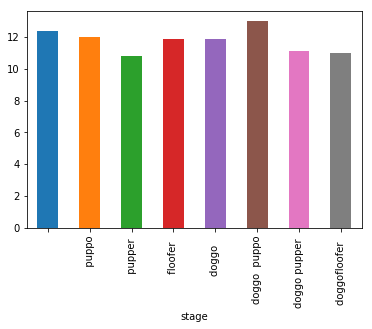

In [44]:
df_complete.groupby('stage')['rating_numerator'].mean().plot(kind='bar')

What is the median per source?

In [43]:
df_complete.groupby('source').median()['rating_numerator']

source
TweetDeck              11.0
Twitter Web Client     10.5
Twitter for iPhone     11.0
Vine - Make a Scene    12.0
Name: rating_numerator, dtype: float64

## 3. Reporting on 1) your data wrangling efforts and 2) your data analyses and visualizations

Create a 300 to 600 word written report called *wrangle_report.pdf* or *wrangle_report.html* that briefly describes your wrangling efforts. This is to be framed as an internal document.

Create a 250-word-minimum written report called *act_report.pdf* or *act_report.html* that communicates the insights and displays the visualization(s) produced from your wrangeld data. This is to be framed as an external document, like a blog post or magazine article, for example.
Both of these documents can be created in separate Jupyter Notebooks using the Markdown functionality of Jupyter Notebooks, then downloading those notebooks as PDF files or HTML files. You might prefer to use a word processor like Google DOcs or Microsoft Word, however.